In [749]:
from filterpy.common import kinematic_kf
import numpy as np
from filterpy.kalman import IMMEstimator
import math
from filterpy.kalman import KalmanFilter
import pandas as pd

In [1171]:
def state_transition_matrix(v, yaw, T):
    term13 = (v/yaw) * (-math.cos(yaw) + math.cos(T * yaw + yaw))
    term14 = (-math.sin(yaw) + math.sin(T * yaw + yaw))/yaw
    term15 = T * v * math.cos(T * yaw + yaw)/ yaw - v * (-math.sin(yaw) + math.sin(T * yaw + yaw)) / yaw **2
    term23 = (v/yaw) * (-math.sin(yaw) + math.sin(T * yaw + yaw))
    term24 = (math.cos(yaw) - math.cos(T * yaw + yaw)) / yaw
    term25 = T * v * math.sin(T * yaw + yaw)/ yaw - v * (math.cos(yaw) - math.cos(T * yaw + yaw)) / yaw **2
    state_transition_matrix = np.array([[1, 0, term13, term14, term15],
                                        [0, 1, term23, term24, term25],
                                        [0, 0, 1, 0, T],
                                        [0, 0, 0, 1, 0],
                                        [0, 0, 0, 0, 1]])
    return state_transition_matrix

def direction(current_state, destination_state):
    # atan2(b1−a1,b2−a2)
    directions1 = np.linalg.norm((np.array(destination_state) - np.array(current_state)))
    # dest_tempp = np.array(destination_state) - np.array(current_state)
    # temp_d = math.atan2(dest_tempp[0], dest_tempp[1])
    # directions1 = math.degrees(temp_d)
    # print(directions1)
    return directions1

In [751]:
test_df_path = "C:/Users/sakif/jupyter projects/thesis_test/modular test/Untitled Folder/eth_data_prepared_normal3.csv"
# delta_t = 0.4

In [752]:
test_df = pd.read_csv(test_df_path, index_col=None)

In [753]:
unique_peds = np.unique(test_df['ped_no'])
dest_all = []
for n in range(len(unique_peds)):
    test_df_indiv2 = test_df.loc[test_df['ped_no'] == unique_peds[n]]
    input_xy_temp2 = np.array(test_df_indiv2[['pos_x', 'pos_y']])
    dest_temp = input_xy_temp2[-1]
    dest_all.append(dest_temp)
dest_all = np.array(dest_all)
# dest_all

In [754]:
import matplotlib.pyplot as plt

In [755]:
len(np.unique(dest_all))/2

354.0

In [756]:
from sklearn.cluster import KMeans

In [757]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dest_all)
center_points = kmeans.cluster_centers_
center_points

array([[12.65814642,  5.53807136],
       [-2.42247966,  1.8782528 ],
       [ 3.16009339,  5.38515784],
       [-1.67269075,  7.75310654]])

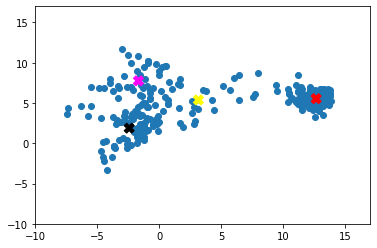

In [758]:
plt.scatter(dest_all[:, 0], dest_all[:, 1])
plt.xlim(-10, 17)
plt.ylim(-10, 17)
plt.scatter(center_points[:, 0], center_points[:, 1], c=["red", "black", "yellow", "magenta"], marker="X", s=100)

In [962]:
# dataframe for individual pedestrian 
test_df_indiv = test_df.loc[test_df['ped_no'] == 12]
# test_df_indiv = test_df_indiv.loc[test_df_indiv['frame_id'] >= 846]

In [963]:
input_xy_temp = np.array(test_df_indiv[["pos_x", "pos_y"]])

In [964]:
len(input_xy_temp)
# len(input_xy_temp[10:])

33

In [965]:
input_xy_temp

array([[12.093503  ,  6.9491148 ],
       [11.677707  ,  6.9380927 ],
       [11.256787  ,  6.9269347 ],
       [10.830646  ,  6.9156383 ],
       [10.433467  ,  6.7836326 ],
       [10.074596  ,  6.7267811 ],
       [ 9.6663374 ,  6.5522283 ],
       [ 9.3397096 ,  6.4911244 ],
       [ 9.006079  ,  6.3488821 ],
       [ 8.6729785 ,  6.28618   ],
       [ 8.2112039 ,  6.2295435 ],
       [ 7.7835489 ,  6.1289142 ],
       [ 7.3505405 ,  6.0270252 ],
       [ 6.8732599 ,  6.0091402 ],
       [ 6.4288714 ,  5.9051721 ],
       [ 5.978812  ,  5.7998772 ],
       [ 5.4830124 ,  5.7801208 ],
       [ 5.0692403 ,  5.7133218 ],
       [ 4.6017793 ,  5.6047765 ],
       [ 4.1367541 ,  5.6245858 ],
       [ 3.7577338 ,  5.5971544 ],
       [ 3.3180835 ,  5.4402314 ],
       [ 2.8791922 ,  5.3694336 ],
       [ 2.4351154 ,  5.2977993 ],
       [ 1.9791737 ,  5.1361458 ],
       [ 1.5743182 ,  5.0605252 ],
       [ 1.1145162 ,  4.9857625 ],
       [ 0.69320737,  4.8176517 ],
       [ 0.27434693,

(-10.0, 17.0)

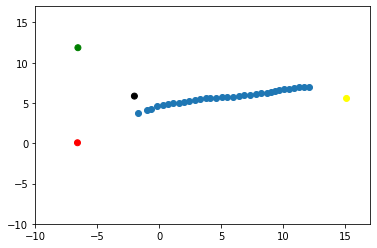

In [978]:
plt.scatter(input_xy_temp[:, 0], input_xy_temp[:, 1])
plt.scatter(dest_list[:, 0], dest_list[:, 1], c=["black", "red", "green", "yellow"])
plt.xlim(-10, 17)
plt.ylim(-10, 17)

In [979]:
"""
start = [2, 10.3]
end_straight = [3, 0.8]
end_left = [-2.8, 5.5]
end_right = [8.3, 5.5]
v = 0.707
delta_t = 0.1
"""
 # sGPS: assume 8.8m/s2 as maximum acceleration, forcing the vehicle
#sCOURSE: assume 0.1rad/s as maximum turn rate for the vehicle
# sVelocity: assume 8.8m/s2 as maximum acceleration, forcing the vehicle
# sYaw: assume 1.0rad/s2 as the maximum turn rate acceleration for the vehicle

'\nstart = [2, 10.3]\nend_straight = [3, 0.8]\nend_left = [-2.8, 5.5]\nend_right = [8.3, 5.5]\nv = 0.707\ndelta_t = 0.1\n'

In [980]:
dest_list = np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 11.867515), (15.10717, 5.5659299)))
# dest_list = center_points
dest_list

array([[-2.        ,  5.8566027 ],
       [-6.5902743 ,  0.06572437],
       [-6.5553084 , 11.867515  ],
       [15.10717   ,  5.5659299 ]])

In [1195]:
def imm_dest_filter(input_xy_temp, dest_list):
    start = input_xy_temp[0]
    # zone1, zone2, zone3, zone4 = [-2, 5.8566027], [-6.5902743, 0.065724367], [-6.5553084, 1.1867515], [15.10717, 5.5659299]
    zone1, zone2, zone3, zone4 = dest_list[0], dest_list[1], dest_list[2], dest_list[3]
    v, delta_t = 0.707, 0.4

    kf1 = KalmanFilter(dim_x=5, dim_z=2)
    kf2 = KalmanFilter(dim_x=5, dim_z=2)
    kf3 = KalmanFilter(dim_x=5, dim_z=2)
    kf4 = KalmanFilter(dim_x=5, dim_z=2)

    directions1, directions2, directions3 = direction(start, zone1), direction(start, zone2), direction(start, zone3)
    directions4 = direction(start, zone4)

    state_transition1 = state_transition_matrix(v, directions1, delta_t)
    state_transition2 = state_transition_matrix(v, directions2, delta_t)
    state_transition3 = state_transition_matrix(v, directions3, delta_t)
    state_transition4 = state_transition_matrix(v, directions4, delta_t)

    kf1.F, kf2.F, kf3.F, kf4.F = state_transition1, state_transition2, state_transition3, state_transition4

    # define initial state [x, y, yaw, velocity, yaw*dt]
    kf1.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions1, v, directions1*delta_t])
    kf2.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions2, v, directions2*delta_t])
    kf3.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions3, v, directions3*delta_t])
    kf4.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions4, v, directions4*delta_t])

    sGPS, sCourse, sVelocity, sYaw = 0.5*8.8*delta_t**2, 0.1*delta_t, 8.8*delta_t, 1.0*delta_t
    temp_q = np.diag([sGPS**2, sGPS**2, sCourse**2, sVelocity**2, sYaw**2])
    # process noise
    kf1.Q, kf2.Q, kf3.Q, kf4.Q = temp_q, temp_q, temp_q, temp_q
    # measurement noise
    kf1.R, kf2.R, kf3.R, kf4.R = np.identity(2)*5, np.identity(2)*5, np.identity(2)*5, np.identity(2)*5
    # Define the covariance matrix.
    # Here I take advantage of the fact that P already contains np.eye(dim_x), and just multiply by the uncertainty:
    kf1.P *= 10; kf2.P *= 10; kf3.P *= 10; kf4.P *= 10

    # define measurement function
    kf1.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 1.0, 0.0, 0.0, 0.0]])
    kf2.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 1.0, 0.0, 0.0, 0.0]])
    kf3.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 1.0, 0.0, 0.0, 0.0]])
    kf4.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 1.0, 0.0, 0.0, 0.0]])

    filters = [kf1, kf2, kf3, kf4]

    mu = [0.25, 0.25, 0.25, 0.25] # each filter is equally likely at the start

    trans = np.array([[0.90, 0.033, 0.033, 0.033], 
                      [0.033, 0.90, 0.033, 0.033], 
                      [0.033, 0.033, 0.90, 0.033],
                      [0.033, 0.033, 0.033, 0.90]
                     ]) 
    # M[i,j] is the probability of switching from filter j to filter i.

    imm = IMMEstimator(filters, mu, trans)
    for i in range(len(input_xy_temp)):
        z = input_xy_temp[i]
        imm.predict()
        imm.update(z)
    chosen_filter = np.argmax(imm.mu)
    estimated_destination = dest_list[chosen_filter]
    # print("Highest probability: ", np.max(imm.mu))
    return estimated_destination

In [1196]:
len(input_xy_temp)

33

In [1197]:
my_filter = imm_dest_filter(input_xy_temp, dest_list)
my_filter

array([-2.       ,  5.8566027])

In [1198]:
unique_peds = np.unique(test_df['ped_no'])
dest_list = np.array(((-2, 5.8566027), (-6.5902743, 0.065724367), (-6.5553084, 11.867515), (15.10717, 5.5659299)))
estimated_dest_list = []
for n in range(len(unique_peds)):
    test_df_indiv3 = test_df.loc[test_df['ped_no'] == unique_peds[n]]
    input_xy_temp3 = np.array(test_df_indiv3[['pos_x', 'pos_y']])
    estimated_dest_temp = imm_dest_filter(input_xy_temp3, dest_list)
    estimated_dest_list.append(estimated_dest_temp)
    # dest_temp = input_xy_temp2[-1]
    # dest_all.append(dest_temp)
#dest_all = np.array(dest_all)
estimated_dest_list = np.array(estimated_dest_list)
len(estimated_dest_list)

360

In [1199]:
actual_dest_list = []
for n in range(len(unique_peds)):
    test_df_indiv3 = test_df.loc[test_df['ped_no'] == unique_peds[n]]
    input_xy_temp3 = np.array(test_df_indiv3[['pos_x', 'pos_y']])
    temp_n = np.argmin(np.linalg.norm((dest_list - input_xy_temp3[-1]), axis=1))
    temp_n2 = dest_list[temp_n]
    actual_dest_list.append(temp_n2)
actual_dest_list = np.array(actual_dest_list)
len(actual_dest_list)

360

In [1200]:
np.count_nonzero(actual_dest_list == estimated_dest_list)/2

218.0

In [1184]:
261/360
#temp_input_new = np.concatenate((input_xy_temp[0:3], input_xy_temp[8:11], input_xy_temp[16:19], input_xy_temp[24:27]), axis=0)
# temp_input_new

0.725

In [1201]:
df_dest = pd.DataFrame(data=estimated_dest_list, index= unique_peds)
df_dest = df_dest.rename(columns={0: "dest_x", 1: "dest_y"})

In [1202]:
df_dest

,dest_x,dest_y
1,-6.555308,11.867515
2,-2.000000,5.856603
3,-2.000000,5.856603
4,15.107170,5.565930
5,15.107170,5.565930
...,...,...
363,15.107170,5.565930
364,15.107170,5.565930
365,15.107170,5.565930
366,15.107170,5.565930


In [1203]:
df_dest.to_csv("eth_estimated_dests2.csv", columns=["dest_x", "dest_y"])

In [991]:
# put some initial input here. Like the trajectory of first one second
for i in range(len(input_xy_temp)):
    z = input_xy_temp[i]
    my_filter.predict()
    my_filter.update(z)
    print("iteration ", i, ": ",  "mode: ", my_filter.mu)

iteration  0 :  mode:  [0.26325605 0.25448879 0.25681285 0.22544232]
iteration  1 :  mode:  [0.29132597 0.27777965 0.28453346 0.14636091]
iteration  2 :  mode:  [0.31300279 0.29667154 0.31237211 0.07795356]
iteration  3 :  mode:  [0.31973906 0.30394841 0.33222469 0.04408784]
iteration  4 :  mode:  [0.32093808 0.30903245 0.34104995 0.02897952]
iteration  5 :  mode:  [0.32061432 0.3117448  0.34621686 0.02142402]
iteration  6 :  mode:  [0.31396709 0.32110509 0.34746396 0.01746386]
iteration  7 :  mode:  [0.31007673 0.32576344 0.34876687 0.01539296]
iteration  8 :  mode:  [0.30758827 0.32998763 0.34753048 0.01489362]
iteration  9 :  mode:  [0.30473789 0.33167345 0.34849083 0.01509783]
iteration  10 :  mode:  [0.29226526 0.33692043 0.35526973 0.01554458]
iteration  11 :  mode:  [0.28137759 0.34137817 0.36051908 0.01672516]
iteration  12 :  mode:  [0.2737847  0.34414088 0.36396005 0.01811438]
iteration  13 :  mode:  [0.26705797 0.34507853 0.36861037 0.01925313]
iteration  14 :  mode:  [0.265

In [616]:
kf2.F

array([[ 1.        ,  0.        , -0.00256224, -0.07756785,  0.02234999],
       [ 0.        ,  1.        , -0.05484047,  0.0036241 , -0.01203627],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.4       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

In [619]:
temp_goal = (dest_list[1] - input_xy_temp[0])/np.linalg.norm((dest_list[1] - input_xy_temp[0]))
temp_goal

array([-0.84996266, -0.52684293])

In [620]:
(dest_list[3] - input_xy_temp[0])/np.linalg.norm((dest_list[3] - input_xy_temp[0]))

array([ 0.99169066, -0.12864541])

In [647]:
# 5 zones
start = input_xy_temp[0]
# zone1, zone2, zone3, zone4 = [-2, 5.8566027], [-6.5902743, 0.065724367], [-6.5553084, 1.1867515], [15.10717, 5.5659299]
zone1, zone2, zone3, zone4, zone5 = dest_list[0], dest_list[1], dest_list[2], dest_list[3], dest_list[4]
v, delta_t = 0.707, 0.4

kf1 = KalmanFilter(dim_x=5, dim_z=2)
kf2 = KalmanFilter(dim_x=5, dim_z=2)
kf3 = KalmanFilter(dim_x=5, dim_z=2)
kf4 = KalmanFilter(dim_x=5, dim_z=2)
kf5 = KalmanFilter(dim_x=5, dim_z=2)

directions1, directions2, directions3 = direction(start, zone1), direction(start, zone2), direction(start, zone3)
directions4, directions5 = direction(start, zone4), direction(start, zone5)

state_transition1 = state_transition_matrix(v, directions1, delta_t)
state_transition2 = state_transition_matrix(v, directions2, delta_t)
state_transition3 = state_transition_matrix(v, directions3, delta_t)
state_transition4 = state_transition_matrix(v, directions4, delta_t)
state_transition5 = state_transition_matrix(v, directions5, delta_t)

kf1.F, kf2.F, kf3.F, kf4.F = state_transition1, state_transition2, state_transition3, state_transition4
kf5.F = state_transition5

# define initial state [x, y, yaw, velocity, yaw*dt]
kf1.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions1, v, directions1*delta_t])
kf2.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions2, v, directions2*delta_t])
kf3.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions3, v, directions3*delta_t])
kf4.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions4, v, directions4*delta_t])
kf5.x = np.array([input_xy_temp[0, 0], input_xy_temp[0, 1], directions4, v, directions4*delta_t])

sGPS, sCourse, sVelocity, sYaw = 0.5*8.8*delta_t**2, 0.1*delta_t, 8.8*delta_t, 1.0*delta_t
temp_q = np.diag([sGPS**2, sGPS**2, sCourse**2, sVelocity**2, sYaw**2])
# process noise
kf1.Q, kf2.Q, kf3.Q, kf4.Q, kf5.Q = temp_q, temp_q, temp_q, temp_q, temp_q
# measurement noise
kf1.R, kf2.R, kf3.R, kf4.R = np.identity(2)*5, np.identity(2)*5, np.identity(2)*5, np.identity(2)*5
kf5.R = np.identity(2)*5
# Define the covariance matrix.
# Here I take advantage of the fact that P already contains np.eye(dim_x), and just multiply by the uncertainty:
kf1.P *= 10; kf2.P *= 10; kf3.P *= 10; kf4.P *= 10; kf5.P *= 10

# define measurement function
kf1.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf2.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf3.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf4.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])
kf5.H = np.array([[1.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 0.0]])

filters = [kf1, kf2, kf3, kf4, kf5]

mu = [0.20, 0.20, 0.20, 0.20, 0.20] # each filter is equally likely at the start

trans = np.array([[0.80, 0.05, 0.05, 0.05, 0.05], 
                  [0.05, 0.80, 0.05, 0.05, 0.05], 
                  [0.05, 0.05, 0.80, 0.05, 0.05],
                  [0.05, 0.05, 0.05, 0.80, 0.05],
                  [0.05, 0.05, 0.05, 0.05, 0.80]
                 ]) 
# M[i,j] is the probability of switching from filter j to filter i.

imm = IMMEstimator(filters, mu, trans)

6.299083902844197
4.031289776980518
12.907428447280036
18.6783758247935
8.165754194504627


In [648]:
# put some initial input here. Like the trajectory of first one second
for i in range(len(input_xy_temp)):
    # x = interpolated_z[i, 0]
    # y = interpolated_z[i, 1]
    # z = np.array([[x], [y]])
    z = input_xy_temp[i]
    # print(z)
    # print(z.shape)
    
    imm.predict()
    imm.update(z)
    # print(imm.x.T)
    print("iteration ", i, ": ",  "mode: ", imm.mu)
    # print()

iteration  0 :  mode:  [0.19575063 0.19157723 0.22517819 0.22571735 0.16177661]
iteration  1 :  mode:  [0.16342576 0.16339877 0.26915046 0.3134176  0.09060741]
iteration  2 :  mode:  [0.10746714 0.12932855 0.28470182 0.41246838 0.06603412]
iteration  3 :  mode:  [0.07891549 0.09683694 0.27494744 0.48521155 0.06408857]
iteration  4 :  mode:  [0.06376931 0.08549222 0.25090527 0.53065283 0.06918036]
iteration  5 :  mode:  [0.05708883 0.07333543 0.23245207 0.56454478 0.07257888]
iteration  6 :  mode:  [0.05205679 0.06981162 0.23448841 0.56166774 0.08197545]
iteration  7 :  mode:  [0.05028004 0.06654713 0.24139337 0.5546683  0.08711116]
iteration  8 :  mode:  [0.04986    0.0625244  0.25328326 0.5449624  0.08936994]
iteration  9 :  mode:  [0.05043694 0.06059567 0.2610069  0.53857976 0.08938072]
iteration  10 :  mode:  [0.05178939 0.0607443  0.26556948 0.53211118 0.08978565]
iteration  11 :  mode:  [0.05331307 0.05812784 0.27134624 0.52850184 0.08871101]
iteration  12 :  mode:  [0.0550145  0.

In [727]:
kf_test = kinematic_kf(dim=2, order=2, dt=0.4, order_by_dim=False)

In [728]:
kf_test.F

array([[1.  , 0.  , 0.4 , 0.  , 0.08, 0.  ],
       [0.  , 1.  , 0.  , 0.4 , 0.  , 0.08],
       [0.  , 0.  , 1.  , 0.  , 0.4 , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.4 ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [729]:
np.linalg.norm((np.array((12, 5)) - np.array((8, 3))))

4.47213595499958

In [748]:
tt = (np.array((-1.5219591, 6.0516812)) - np.array((13, 5.8)))
tt

0.017328475346254417

In [744]:
np.arccos(tt)

c:\users\sakif\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


array([       nan, 1.31637935])

In [745]:
np.linalg.norm(tt)

14.524139889456665

In [736]:
np.sqrt((0.89442719**2 + 0.4472136**2))

1.000000001118128